By querying GDR2 TAP services we will construct a matrix that contains the starcounts per G mag bin and per hpx.

First we do this for all GDR2 sources (GDR2_all) and then only for sources with radial_velocity measurement, positive and high SNR parallax measurement (GDR2_rvs). This gives us the 'internal' completeness of the RVS sample.

Then we multiply that with a GDR2 'total' completeness map, inferred from xmatch with 2MASS. 

In [ ]:
import gdr2_completeness.tap_queries as tap
import gdr2_completeness.data_manipulation as dr2
import numpy as np

In [2]:
# Here we download the starcounts per healpix and Gmagbin for all GDR2 sources:

# For our spatial resolution we chose hpx level 6 --> which is about 0.8 arcdeg^2 per hpx.
source_id_factor = tap.gaia_hpx_factor(6)

# Select_what defines in the ADQL query what we want to retrieve
Select_what =   """ROUND(phot_g_mean_mag,1) as bin,
  FLOOR(source_id/%d) as hpx,
  COUNT(*) as ct""" %(source_id_factor)

# Here the WHERE condition is added automatically, which splits up the whole sky query into hpx chunks.
# It looks like: 'WHERE source_id between 0 and XXX'. 

## The under_condition follows that text in the ADQL query and can also be used to add more conditions (see below). 
under_condition = """GROUP BY bin, hpx
                    ORDER BY hpx"""

## Where to store the downloaded data
folder_all = 'data/tutorial/allgdr2/'

## Into how many hpx chunks the query should be divided: 0 --> 12, 1 --> 48, 2 --> 192 etc.
## Beware that the hpx are have not the same number of sources. The difference can be on the order of 1000.
hpx_level = 1

## Which service do you want to use:
#           CDS - this is the vizier service
#           ARI - this is the ARI Gaia service
#           ESA - this is the ESA service (did not seem to work with pyvo so far)
#           GDR2light - this is the GAVO service for Gaia DR2 light (only the main columns are included, bad if you need quality flags)
#           GDR2mock - this is also hosted by GAVO and contains the GDR2 mock data which is a model Galaxy with a gmag limit of 20.7
service = 'GDR2light'

## This is the function querying. Please in order to not overload the Server test it on only one healpix beforehand
## By setting the 'test_1st_hpx_only' flag to 'True'.
tap.tap_query_gdr2_hpx_sliced(service = service, hpx_level = hpx_level, folder = folder_all,
                          Select_what = Select_what, under_condition = under_condition,
                          verbose = True, test_1st_hpx_only = False)

## This function joins all the individual files and creates the matrix that contains the starcounts per hpx and gmag
tap.convert_to_starcount_cube(folder_all)

Healpix level, gaia_factor, #healpixels
1 144115188075855872 48
folder did not exist before, is created now
number of attempt: 1
number of files in folder: 0
number of hpx chunks: 48
0 added to the job list
1 added to the job list
2 added to the job list
3 added to the job list
4 added to the job list
5 added to the job list
6 added to the job list
7 added to the job list
8 added to the job list
9 added to the job list
10 added to the job list
11 added to the job list
12 added to the job list
13 added to the job list
14 added to the job list
15 added to the job list
16 added to the job list
17 added to the job list
18 added to the job list
19 added to the job list
20 added to the job list
21 added to the job list
22 added to the job list
23 added to the job list
24 added to the job list
25 added to the job list
26 added to the job list
27 added to the job list
28 added to the job list
29 added to the job list
30 added to the job list
31 added to the job list
32 added to the job list
33

In [15]:
## Same as above but now where parallax is good and RVS measurement is available:
under_condition = """AND radial_velocity IS NOT NULL
                    AND parallax > 0
                    AND parallax / parallax_error > 20
                    GROUP BY bin, hpx
                    ORDER BY hpx"""
folder_cut = 'data/tutorial/rvs_and_good_parallax/'
tap.tap_query_gdr2_hpx_sliced(service = service, hpx_level = hpx_level, folder = folder_cut,
                              Select_what = Select_what, under_condition = under_condition,
                              verbose = True, test_1st_hpx_only = False)
tap.convert_to_starcount_cube(folder_cut)

Healpix level, gaia_factor, #healpixels
1 144115188075855872 48
folder did not exist before, is created now
number of attempt: 1
number of files in folder: 0
number of hpx chunks: 48
0 added to the job list
1 added to the job list
2 added to the job list
3 added to the job list
4 added to the job list
5 added to the job list
6 added to the job list
7 added to the job list
8 added to the job list
9 added to the job list
10 added to the job list
11 added to the job list
12 added to the job list
13 added to the job list
14 added to the job list
15 added to the job list
16 added to the job list
17 added to the job list
18 added to the job list
19 added to the job list
20 added to the job list
21 added to the job list
22 added to the job list
23 added to the job list
24 added to the job list
25 added to the job list
26 added to the job list
27 added to the job list
28 added to the job list
29 added to the job list
30 added to the job list
31 added to the job list
32 added to the job list
33

In [25]:
# Loading the GDR2 completeness map inferred from 2MASS xmatch    
folder_online_data = 'data/tutorial/online_data/' 
dr2.download_completeness_maps(folder_online_data)
c_dr2,bins_cdr2 = dr2.create_completeness_matrix(folder_online_data)

# Loading the all_GDR2 sample starcounts
data_all = np.load(folder_all + 'result.npy')
bins_all = np.load(folder_all + 'all_bins.npy')

# The data for the all_GDR2 sample can alternatively be directly downloaded from a preformatted dump 
#dr2.download_completeness_maps(folder_online_data, also_dr2_all_starcounts = True)
#data_all = np.load(folder_online_data + 'dr2_starcounts.npy')
#bins_all = np.load(folder_online_data + 'dr2_bins.npy')

# Loading the RVS and good parallaxes sample
data_qual = np.load(folder_cut + 'result.npy')
bins_qual = np.load(folder_cut + 'all_bins.npy')

print('The data structure of the completeness maps')    
print('GDR2_all:',np.shape(bins_all),np.shape(data_all))
print('GDR2_cut:',np.shape(bins_qual),np.shape(data_qual))
print('GDR2completeness inferred from xmatch with 2MASS:',np.shape(bins_cdr2),np.shape(c_dr2))
print('In fact the latter only has 3 G magnitude bins: 8-12,12-15 and 15-18 which are just brought onto the format of the GDR2_all matrix. We dont even interpolate here. For example we just use the 8-12 bin values for all mag bins between 8 and 12.' )

The data structure of the completeness maps
GDR2_all: (218,) (49152, 218)
GDR2_cut: (140,) (49152, 140)
GDR2completeness inferred from xmatch with 2MASS: (218,) (49152, 218)
In fact the latter only has 3 G magnitude bins: 8-12,12-15 and 15-18 which are just brought onto the format of the GDR2_all matrix. We dont even interpolate here. For example we just use the 8-12 bin values for all mag bins between 8 and 12.


GDR2all


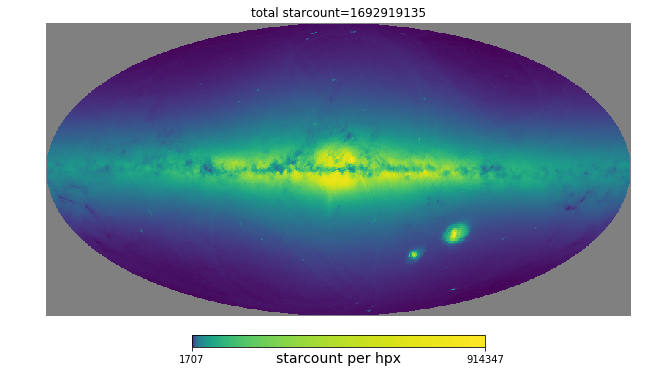

GDR2_rvs_good_parallax


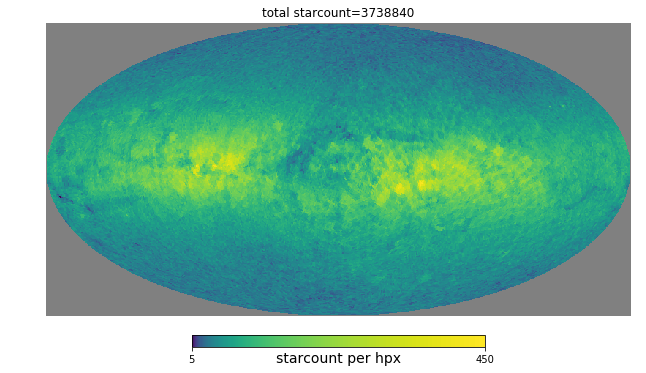

Completeness DR2 inferred from crossmatch with 2MASS 8-12 G bin


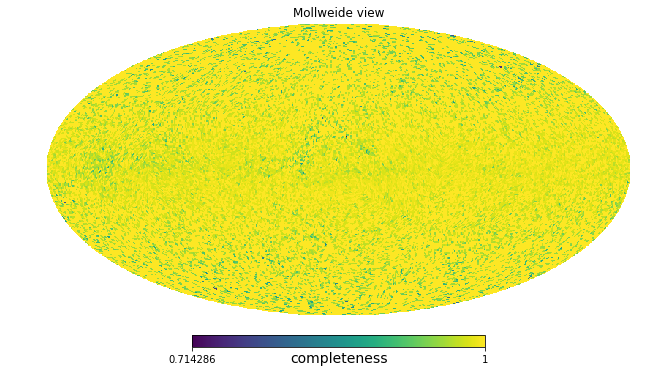

Completeness DR2 inferred from crossmatch with 2MASS 12-15 G bin


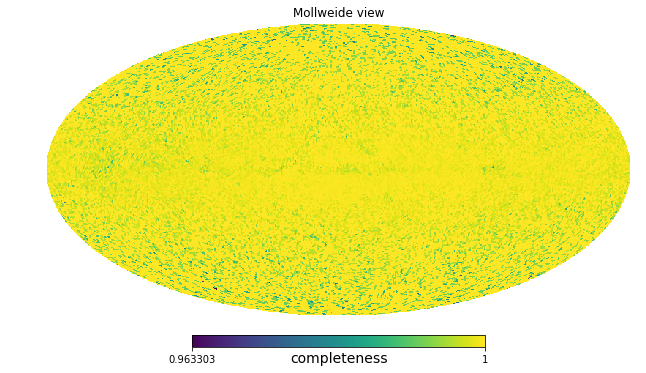

Completeness DR2 inferred from crossmatch with 2MASS 15-18 G bin


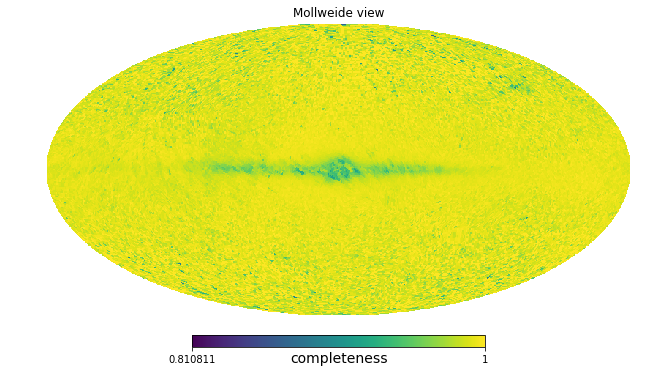

In [26]:
## Plotting the retrieved skymaps

print('GDR2all')
dr2.plot_mollweide_log(dr2.density_sky(data_all))
print('GDR2_rvs_good_parallax')
dr2.plot_mollweide_log(dr2.density_sky(data_qual))
print('Completeness DR2 inferred from crossmatch with 2MASS 8-12 G bin')
dr2.plot_mollweide_linear(np.ravel(c_dr2[:,bins_cdr2==10]))
print('Completeness DR2 inferred from crossmatch with 2MASS 12-15 G bin')
dr2.plot_mollweide_linear(np.ravel(c_dr2[:,bins_cdr2==13]))
print('Completeness DR2 inferred from crossmatch with 2MASS 15-18 G bin')
dr2.plot_mollweide_linear(np.ravel(c_dr2[:,bins_cdr2==16]))

In [24]:
# We create the matrix for the GDR internal completeness
completeness_rvs = np.zeros(shape = (len(data_qual),len(bins_qual)))

# Dividing in each bin the number of starcounts for the RVS and the total sample
for mag in bins_qual:
    completeness_rvs[:,bins_qual == mag] = np.divide(data_qual[:,bins_qual == mag],data_all[:,bins_all == mag])   
    
# Constructing the total completeness of the RVS sample in gmag bins by multiplying with the external completeness map
total_completeness_rvs = np.zeros_like(completeness_rvs)
for mag in bins_qual:
    total_completeness_rvs[:,bins_qual == mag] = completeness_rvs[:,bins_qual == mag] * c_dr2[:,bins_cdr2 == mag]

/home/rybizki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


RVS completeness for G= 8


/home/rybizki/anaconda3/lib/python3.6/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/home/rybizki/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/home/rybizki/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


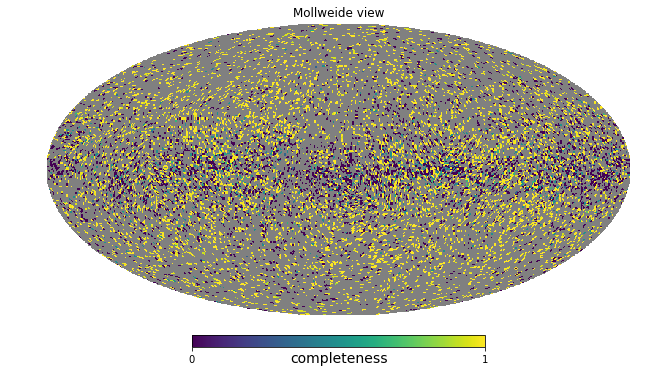

RVS completeness for G= 9


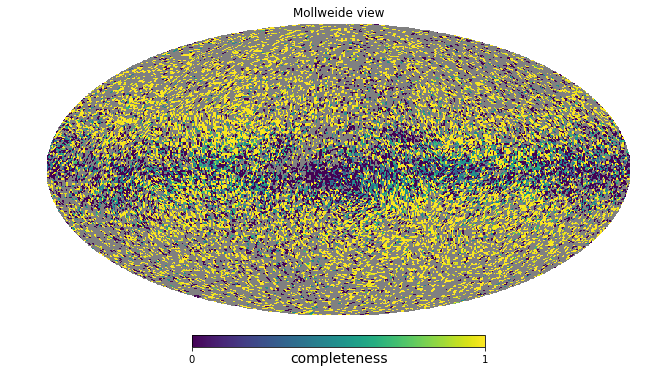

RVS completeness for G= 10


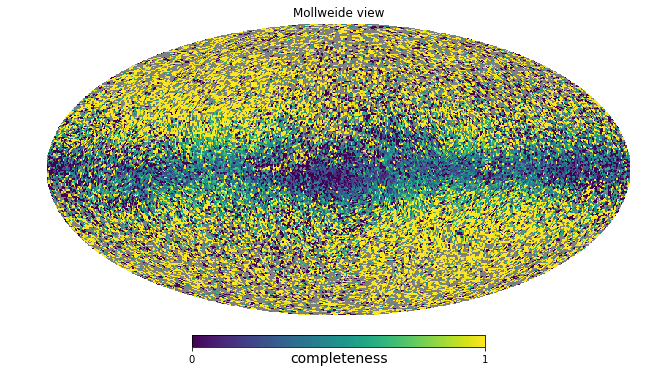

RVS completeness for G= 11


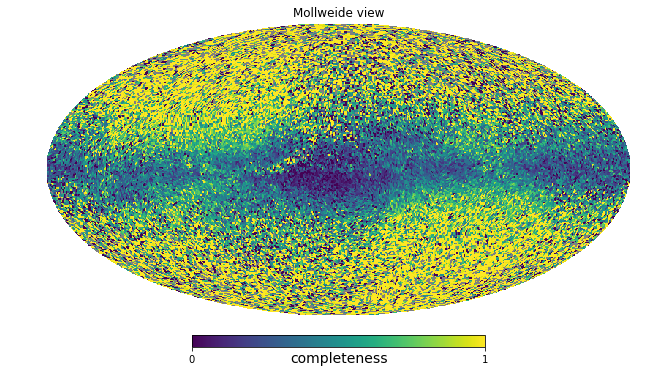

RVS completeness for G= 12


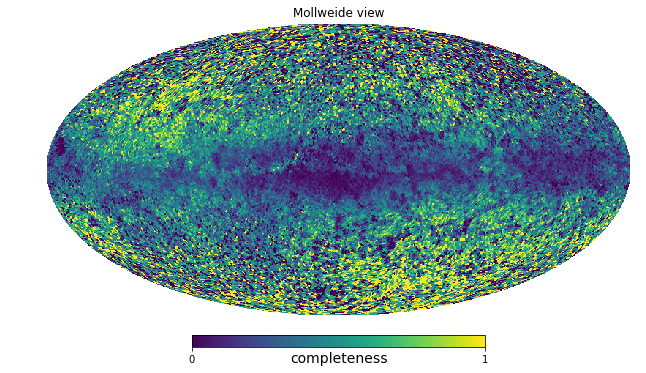

RVS completeness for G= 13


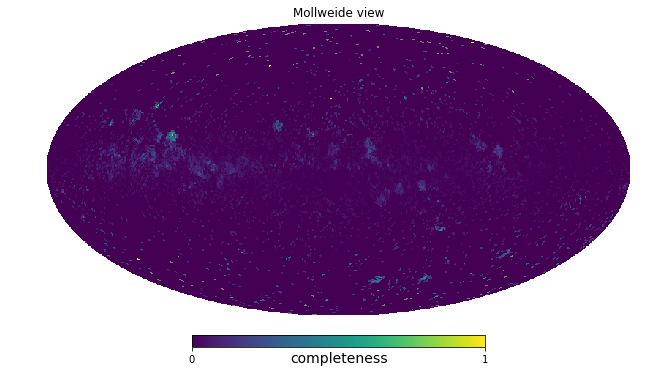

In [23]:
# Plotting the RVS sample completeness for a few magnitude bins:

for item in [8,9,10,11,12,13]:
    print('RVS completeness for G=',item)
    data = np.ravel(total_completeness_rvs[:,np.where(bins_cdr2 == item)])
    dr2.plot_mollweide_linear(data)